In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
train_data=pd.read_csv("pulsar_data_train.csv")
test_data=pd.read_csv("pulsar_data_test.csv")
df=pd.concat([train_data,test_data],ignore_index=True)
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,NaN
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,NaN
17895,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN


In [3]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       2502
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1702
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     869
target_class                                     5370
dtype: int64

In [4]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,15396.000000,17898.000000,17898.000000,16196.000000,17898.000000,17029.000000,12528.000000
mean,111.079968,46.549532,0.480081,1.770279,12.614400,26.373476,8.303556,104.726073,0.092034
std,25.652935,6.843189,1.068333,6.167913,29.472897,19.542821,4.506092,106.612375,0.289085
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.026670,-0.188572,1.923077,14.443905,5.781506,34.776492,0.000000
50%,115.078125,46.947479,0.224414,0.198710,2.801839,18.457026,8.433515,82.768138,0.000000
75%,127.085938,51.023202,0.473488,0.927783,5.464256,28.444832,10.702959,139.163008,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [6]:
df.columns.str.strip()

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [7]:
df['target_class'].fillna(np.random.randint(0, 2), inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1760\370136802.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['target_class'].fillna(np.random.randint(0, 2), inplace=True)


In [8]:
df.columns=['Mean','SD','Kurtosis','Skewness','DM_SNR_Mean','DM_SMR_SD','DM-SNR Kurtosis','DM-SNR Skewness','target_class']
df

,Mean,SD,Kurtosis,Skewness,DM_SNR_Mean,DM_SMR_SD,DM-SNR Kurtosis,DM-SNR Skewness,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,0.0
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,0.0
17895,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,0.0
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,0.0


In [9]:
df['DM-SNR Skewness'].fillna(df['DM-SNR Skewness'].skew(),inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1760\1900547203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DM-SNR Skewness'].fillna(df['DM-SNR Skewness'].skew(),inplace=True)


In [10]:
df['DM_SMR_SD'].fillna(df['DM_SMR_SD'].std(),inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1760\932283381.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DM_SMR_SD'].fillna(df['DM_SMR_SD'].std(),inplace=True)


In [11]:
df['Kurtosis'].fillna(df['Kurtosis'].median(),inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1760\1694610298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Kurtosis'].fillna(df['Kurtosis'].median(),inplace=True)


In [12]:
df.isnull().sum()

Mean               0
SD                 0
Kurtosis           0
Skewness           0
DM_SNR_Mean        0
DM_SMR_SD          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

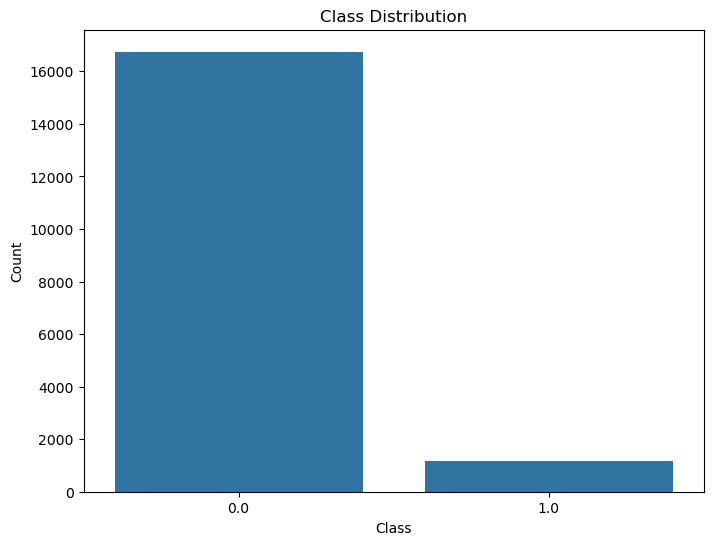

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target_class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

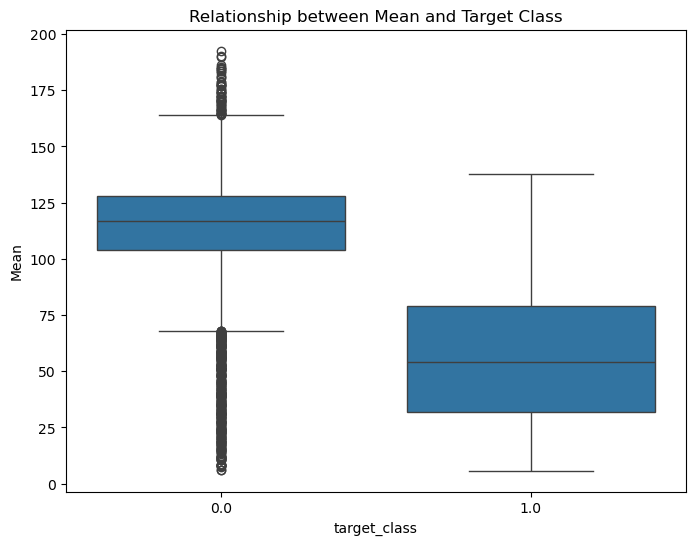

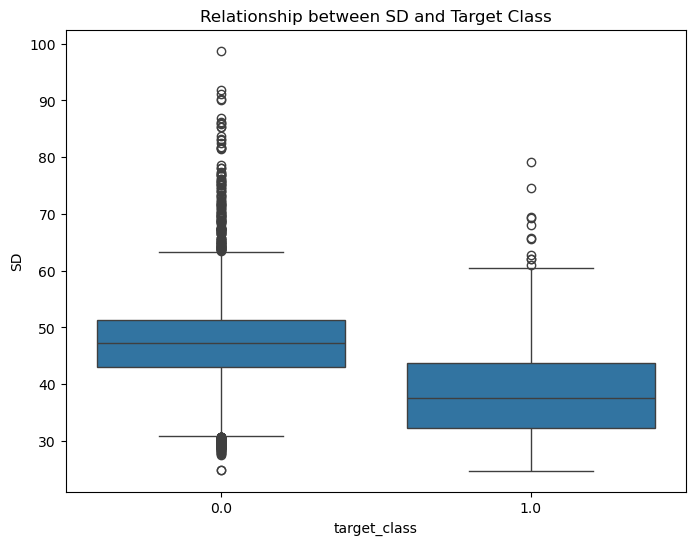

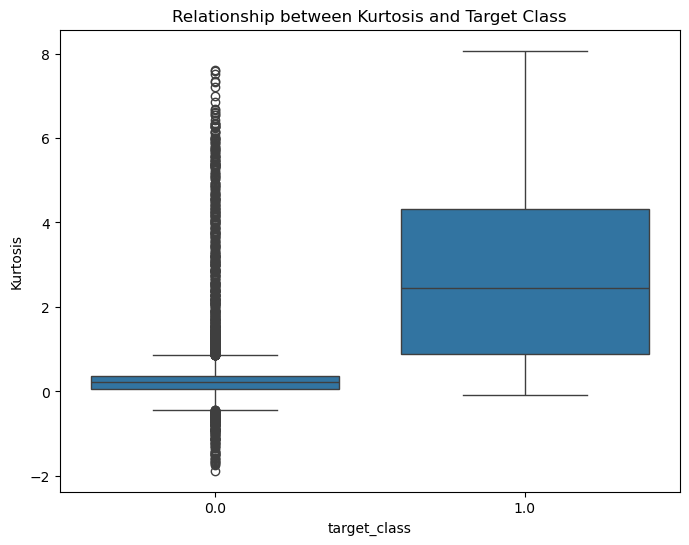

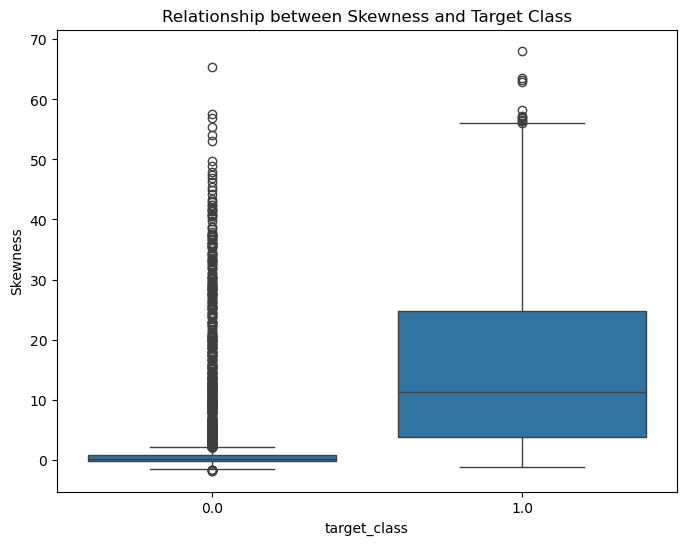

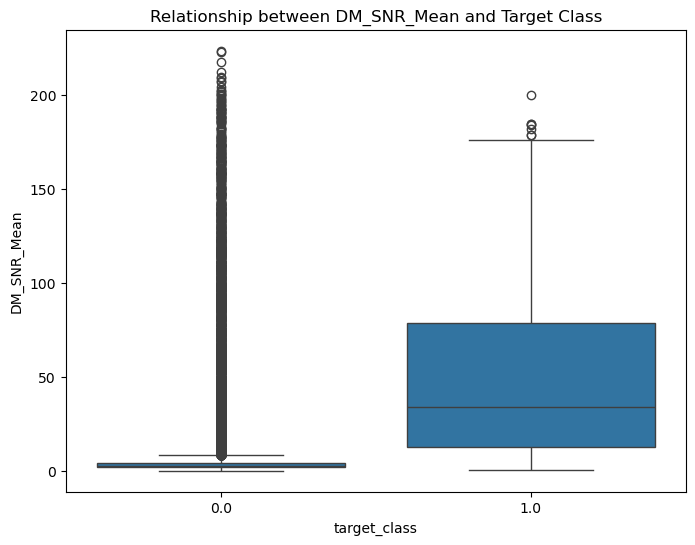

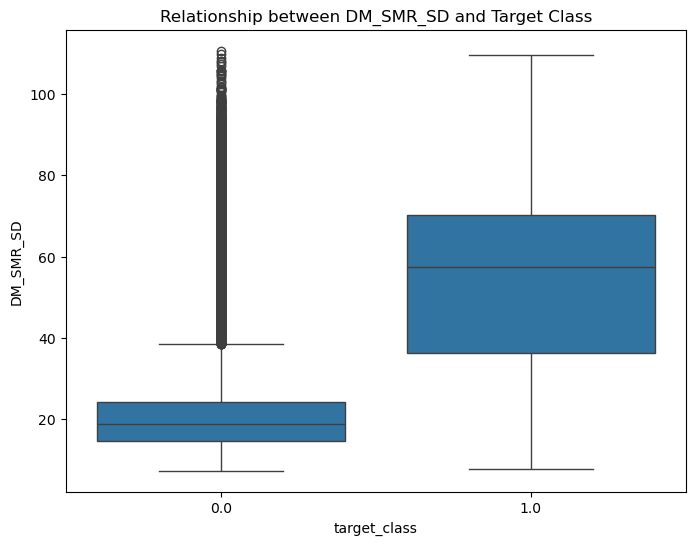

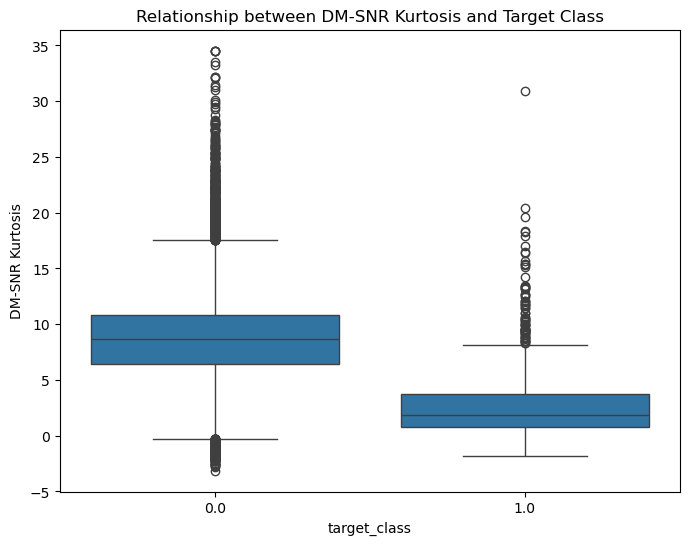

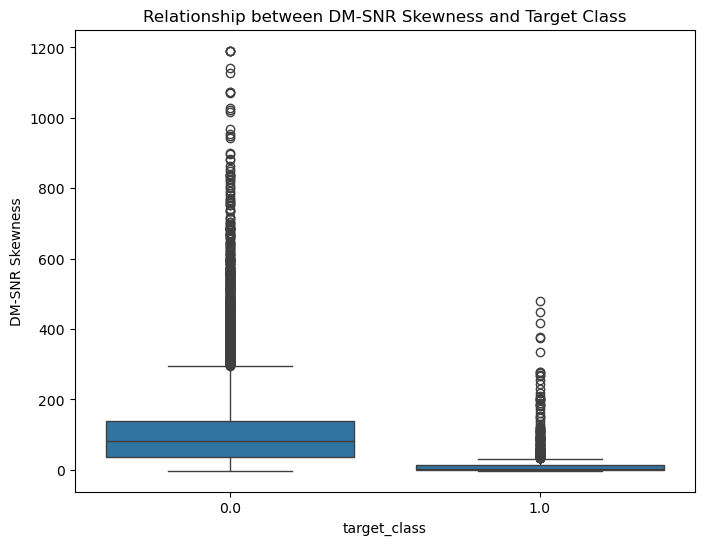

In [14]:
for i in range(8):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target_class', y=df.columns[i], data=df)
    plt.title('Relationship between {} and Target Class'.format(df.columns[i]))
    plt.show()

In [15]:
X=df.iloc[:,:-1]
X

,Mean,SD,Kurtosis,Skewness,DM_SNR_Mean,DM_SMR_SD,DM-SNR Kurtosis,DM-SNR Skewness
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,19.542821,2.958066,7.197842
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128
...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028
17895,136.171875,48.924385,0.224414,0.063227,2.810201,18.695230,7.848577,69.388978
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616


In [16]:
y=df.iloc[:,-1]
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17893    0.0
17894    0.0
17895    0.0
17896    0.0
17897    0.0
Name: target_class, Length: 17898, dtype: float64

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=SVC(kernel='linear', C=1)
model.fit(X_train,y_train)


In [ ]:
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion_matrix",confusion_matrix(y_test,pred))


In [ ]:
print(classification_report(y_test,pred))